<a href="https://colab.research.google.com/github/Manish0000050/data_YesBank_StockPrices.csv/blob/main/Capstone_2_Yes_Bank_stock_closing_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YES BANK STOCK CLOSING PRICE PREDICTION**


##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **Importing libraries**

In [ ]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import neighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8


## **Mounting drive**

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [46]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/project 2/data_YesBank_StockPrices.csv')

##**Preprocesssing data**

In [ ]:
# Let's check how many rows and columns do we have in our dataset
df.shape

(185, 5)

In [ ]:
#Let's see how our data looks like
df.head().T

,0,1,2,3,4
Date,Jul-05,Aug-05,Sep-05,Oct-05,Nov-05
Open,13.0,12.58,13.48,13.2,13.35
High,14.0,14.88,14.87,14.47,13.88
Low,11.25,12.55,12.27,12.4,12.88
Close,12.46,13.42,13.3,12.99,13.41


In [ ]:
df.tail().T

,180,181,182,183,184
Date,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
Open,25.6,12.0,14.3,13.3,12.41
High,28.3,17.16,15.34,14.01,14.9
Low,11.1,11.85,12.75,12.11,12.21
Close,11.95,14.37,13.15,12.42,14.67


In [ ]:
#Checking what features are  in our dataset 
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**Description of our dataset**

Our Yes Bank dataset contains following features:


*  Date: Date is monthly observation of stocks since its inception.
*  Open: It is the price of a stock when the stock exchange open for that day.
*  High: The maximum price of a stock attain at given period of time.
*  Low: The minimum price of a stock attain at given period of time.
*  Close: The price of a stock when the stock exchange closed for that day.



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [ ]:
#Getting information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#Checking dulpicate values in dataset
len(df[df.duplicated()])

0

so no duplicate value is present in our dataset

In [ ]:
#Checking null values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

so our given data set has no null values

In [ ]:
# Summary of our dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,185,185,Jul-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,185.0,NaN,NaN,NaN,105.541405,98.87985,10.0,33.8,62.98,153.0,369.95
High,185.0,NaN,NaN,NaN,116.104324,106.333497,11.24,36.14,72.55,169.19,404.0
Low,185.0,NaN,NaN,NaN,94.947838,91.219415,5.55,28.51,58.0,138.35,345.5
Close,185.0,NaN,NaN,NaN,105.204703,98.583153,9.98,33.45,62.54,153.3,367.9


#**EDA**


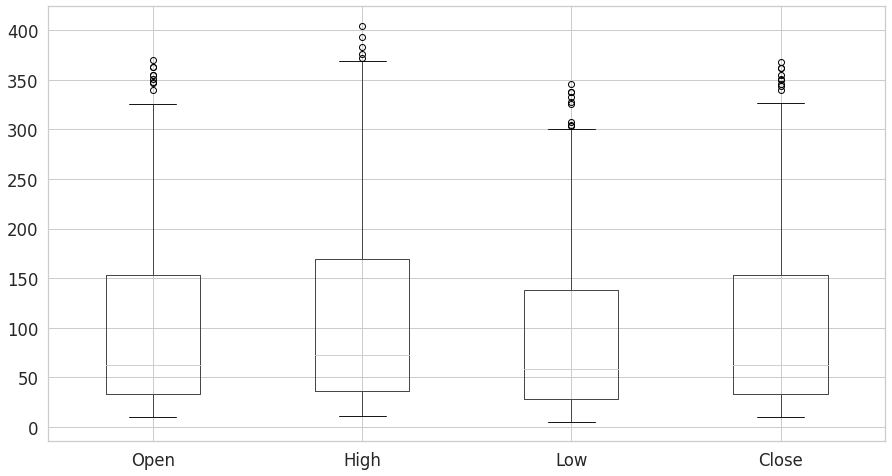

In [ ]:
##Boxplot of variables for checking outliers
fig = plt.figure(figsize =(15, 8))
boxplot = df.boxplot(column=['Open','High','Low',"Close"])
 
plt.show()

In [ ]:
##Changing the date time format
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
##Let's see our dataset after changing date format
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


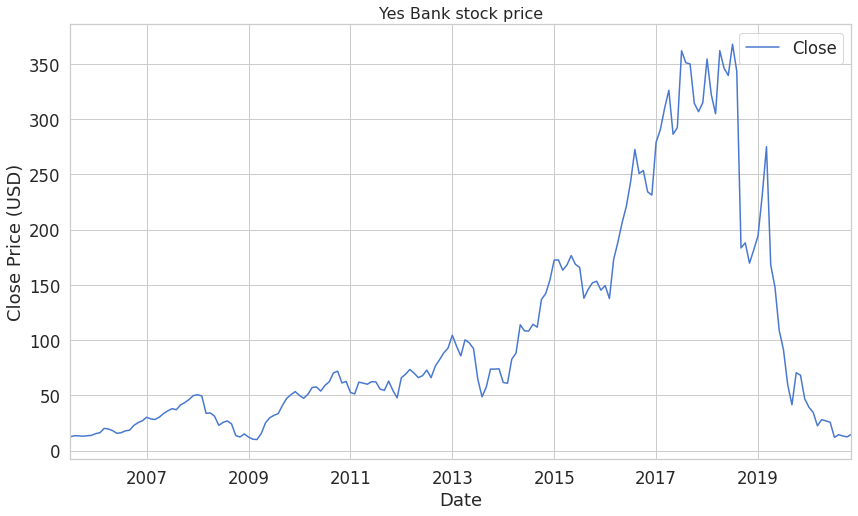

In [ ]:
##Visualizing closing price w.r.t to date of stock
ax = df.plot(x='Date', y="Close");
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
plt.title('Yes Bank stock price', fontsize=16)
plt.show()

In [ ]:
##Declaring dependent and independent variables
indep_var=df[['High','Low','Open']]
dep_var=df['Close']

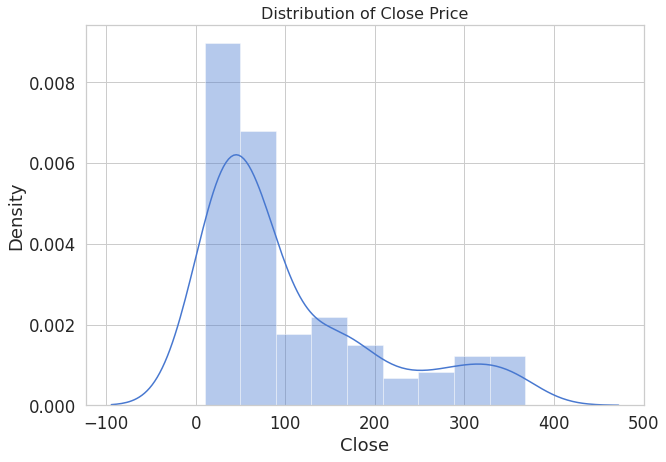

In [ ]:
## Distribution plot of dependent variable
plt.figure(figsize=(10,7))
plt.title('Distribution of Close Price', fontsize=16)
sns.distplot(df['Close'])

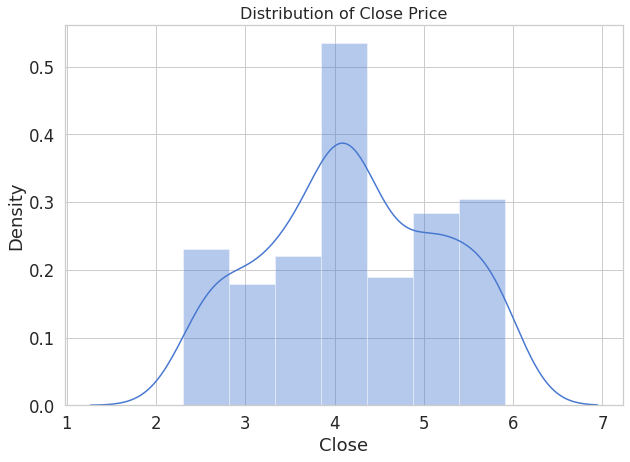

In [ ]:
# Distribution plot of dependent variable after applying log transoformation
plt.figure(figsize=(10,7))
plt.title('Distribution of Close Price', fontsize=16)
sns.distplot(np.log(df['Close']))

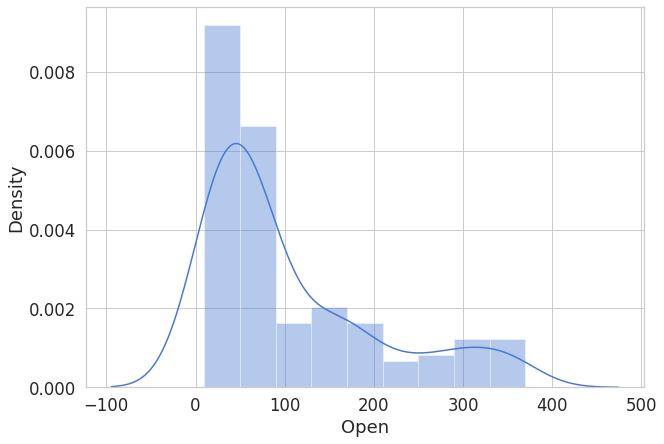

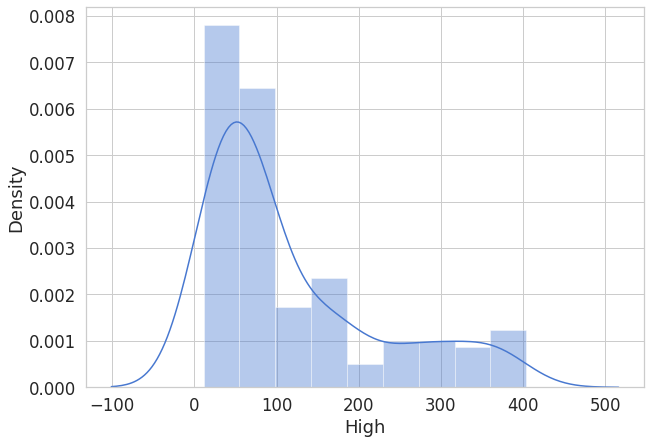

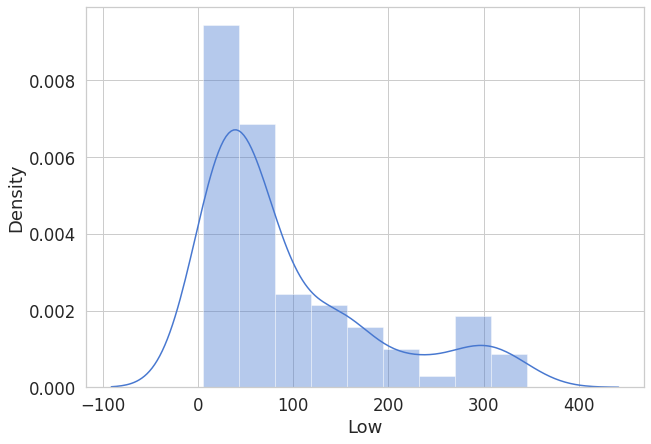

In [ ]:
#Plotting distribution of independent variables
plt.figure(figsize=(10,7))
sns.distplot(df['Open'])

plt.figure(figsize=(10,7))
sns.distplot(df['High'])

plt.figure(figsize=(10,7))
sns.distplot(df['Low'])

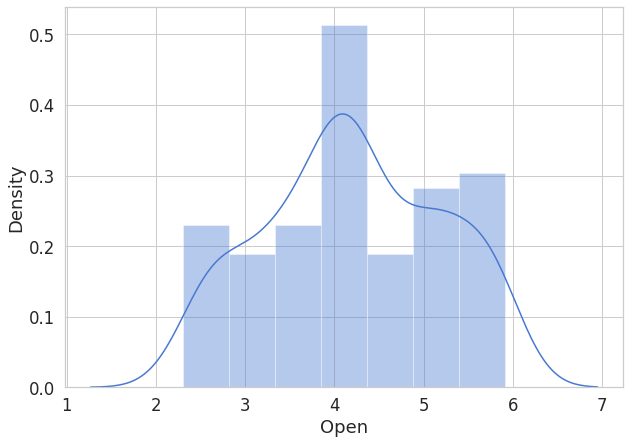

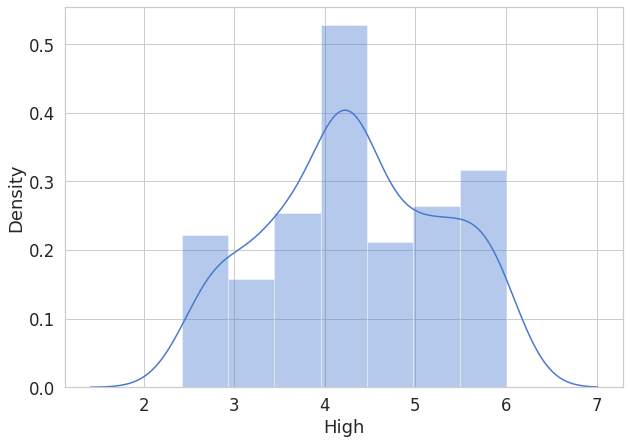

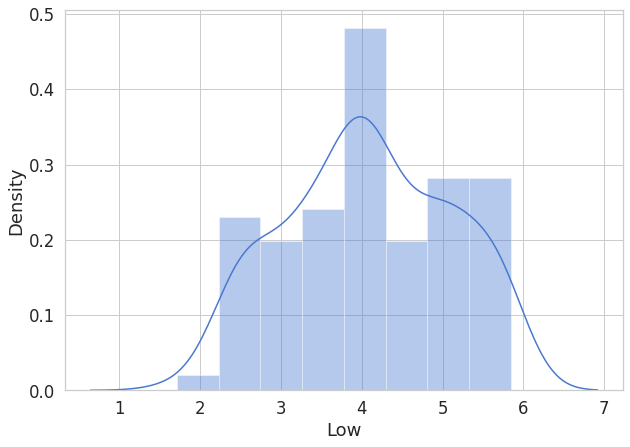

In [ ]:
#Plotting distribution of independent variables by applying log transformation
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Open']))

plt.figure(figsize=(10,7))
sns.distplot(np.log(df['High']))

plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Low']))

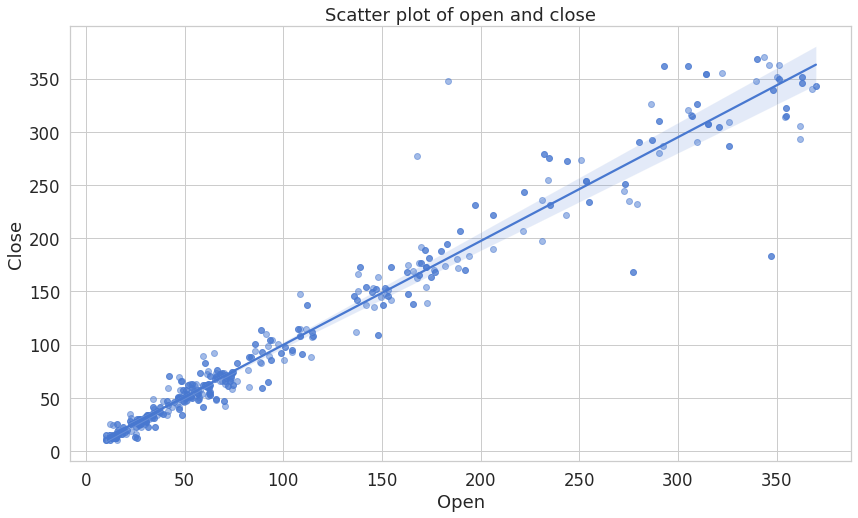

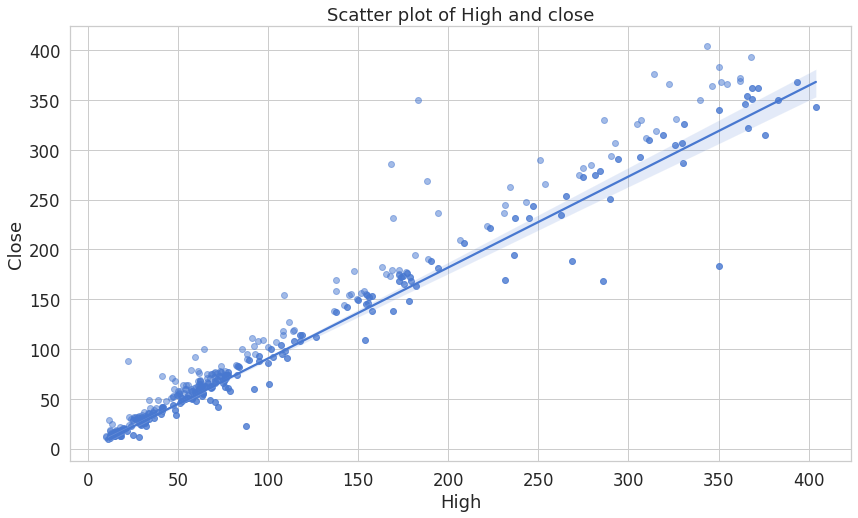

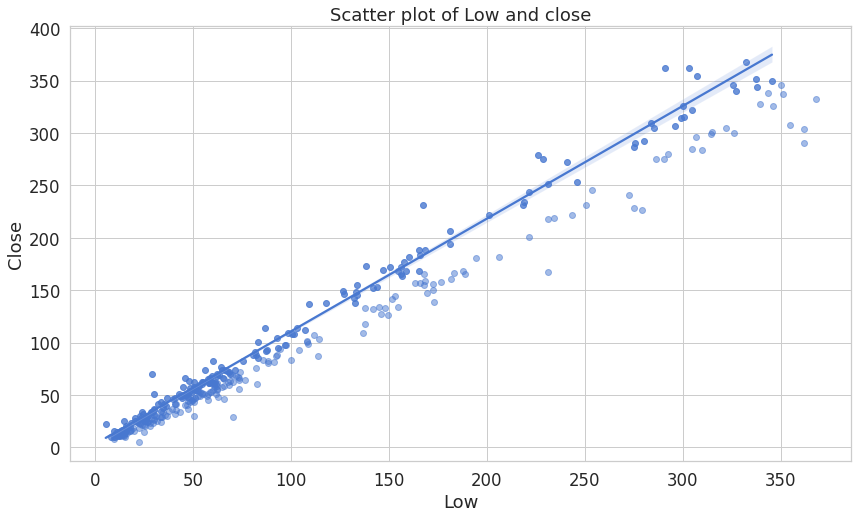

In [ ]:
#Bivarate analysis
plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()

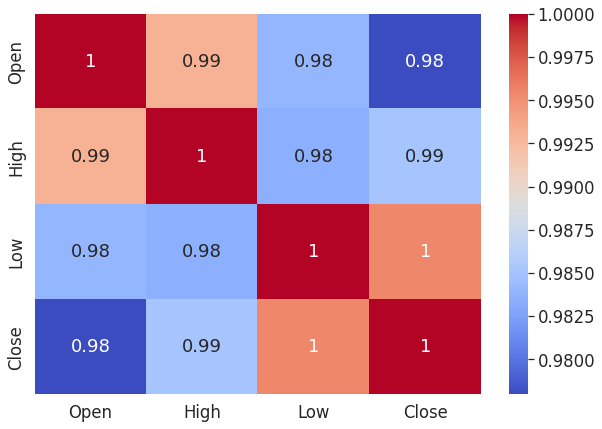

In [ ]:
#Correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

All variables are highly correleated with each other

In [ ]:
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


**In this project, we used the following ML algorithms to solve the given problem :-**

* **Linear Regression** - The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.
The equation for linear regression can be written as:
Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn represent the weights.

* **KNN** - k nearest neighbours ML algorithm finds the similarity between new data points and old data points.
* **Ridge Regression** - In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. Ridge never sets the value of coefficient to absolute zero.
* **Lasso Regression** - Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. Lasoo tends to make coefficients to absolute zero.
* **XGboost Regressor** -XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.




In [ ]:
#empty data frame creation for evaluation metrics for each regression model into this data frame to compare at the end.
i=0
metric_df=pd.DataFrame()

##Splitting data in test and train

In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [ ]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**LINEAR REGRESSION**

In [ ]:
# Fitting Linear Regression to the Training set
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.9943947124704909

In [ ]:
reg.coef_

array([ 206.39223501,  339.75965241, -178.58396386])

In [ ]:
reg.intercept_

7.981643192931017

In [ ]:
#predictions
y_pred = reg.predict(x_test)
y_pred

array([ 26.5264613 ,  30.04697913,  52.99506974,  14.74919015,
       147.01000347, 339.97588471,  47.57404618,  26.7156191 ,
        25.53891247,  51.5485512 , 167.1168406 ,  52.40492841,
        15.03278394, 317.19036116,  74.02532594,  48.98214465,
        28.10792019, 134.70037858, 106.16190122,  90.75305749,
        28.99576342,  15.52145954, 108.22518038,  58.74416284,
       165.96721099,  19.27101903,  15.01972066,  51.82026038,
        30.42231711,  62.47316615, 261.58897929, 338.47373229,
        65.29568021, 232.0096057 ,  95.84913545,  54.02351579,
       242.48451636])

##Evaluation

In [ ]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 19.988578593595022
RMSE : 4.470858820584142
R2 : 0.9978412541225983
Adjusted R2 :  0.9976450044973799


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Linear regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1

##Visualisation

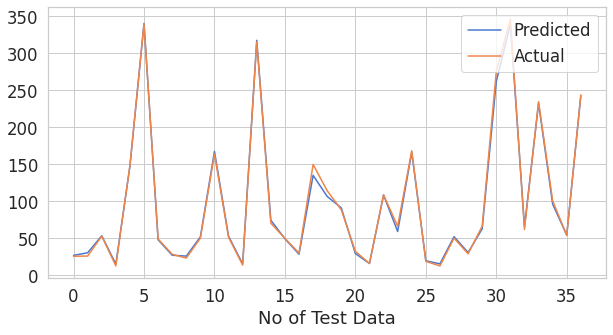

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

#**KNN**

In [ ]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fitting data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
#prediction
y_pred=model.predict(x_test)

##Evaluation

In [ ]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 37.72864864864864
RMSE : 6.142365069633084
R2 : 0.9959253448488675
Adjusted R2 :  0.99555492165331


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='KNN regressor'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1


##Visualisation

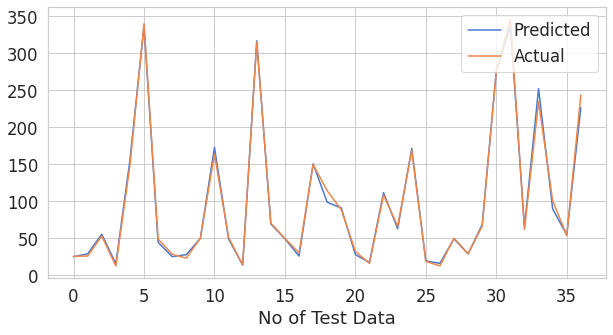

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

#**RIDGE REGRESSION**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(x_train, y_train)

0.9920836705746654

In [ ]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.33373789118506


In [ ]:
#Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

##Evaluation

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 20.095425485603638
RMSE : 4.482792152844434
R2 : 0.9978297147684337
Adjusted R2 :  0.9976324161110186


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

##Visualisation

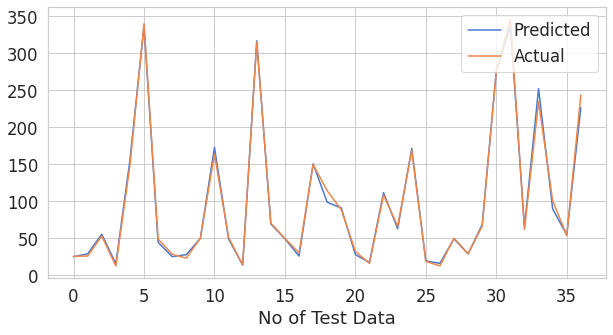

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

#**LASSO REGRESSSION**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.9943947120445368

In [ ]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.90049172560621


In [ ]:
#prediction
y_pred_lasso = lasso_regressor.predict(x_test)

##Evaluation

In [ ]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 20.878651216190214
RMSE : 4.569316274475889
R2 : 0.9977451271971334
Adjusted R2 :  0.9975401387605092


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Lasso regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

##Visualisation

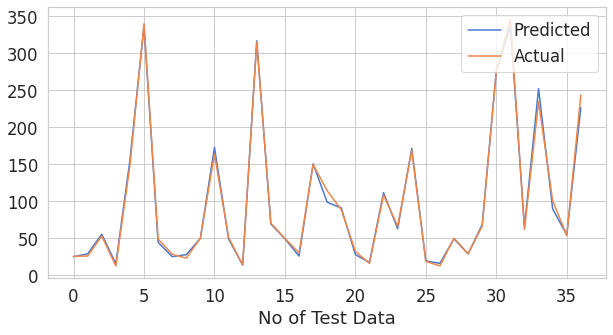

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

#**XGBOOST REGRESSOR**

In [ ]:
#data split
x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [ ]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[16:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#prediction
y_pred_xgb = xgb.predict(x_test)

##Evaluation

In [ ]:
#evaluation metrics

MSE  = mean_squared_error((y_test), (y_pred_xgb))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_pred_xgb))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_xgb)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 32.91328663051823
RMSE : 5.737010251909807
R2 : 0.9964453989815895
Adjusted R2 :  0.9961222534344613


In [ ]:
#Inserting errors in dataframe
metric_df.loc[i,"Model_Name"]='XGBoost regressor'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

##Visualisation

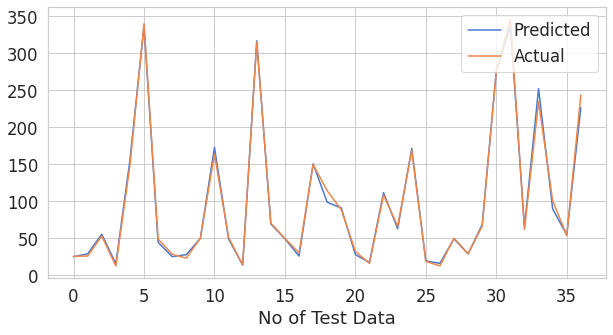

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

#**METRICS COMPARISION**

In [ ]:
#sorting metrics
metric_df.sort_values(by=['MSE'],ascending=True,inplace=True)

In [ ]:
metric_df

,Model_Name,MSE,RMSE,R2,Adjusted R2
0,Linear regression,19.988579,4.470859,0.997841,0.997645
2,Ridge regression,20.095425,4.482792,0.997830,0.997632
3,Lasso regression,20.878651,4.569316,0.997745,0.997540
4,XGBoost regressor,32.913287,5.737010,0.996445,0.996122
1,KNN regressor,37.728649,6.142365,0.995925,0.995555


# CONCLUSION



* There is an increase in trend of Yes Bank stock price till 2018 and then a sudden decrease.
* Target variable is highly correlated with independent variable.
* Of all the models, Linear regression performed best with lowest MSE,RMSE and highest R2 score of 0.997841
* The accuracy of each model is more than 90%

